# simple linear regression

## 1. import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
import seaborn as sns

# reading data 

In [4]:
data = pd.read_csv('student_performance.csv')

In [5]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# cleaning data 

In [19]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].replace({'Yes':1,'No':0})

# taking a look at data 

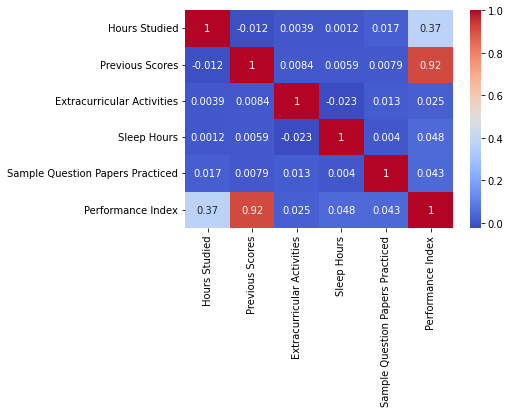

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [20]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()
data.describe()

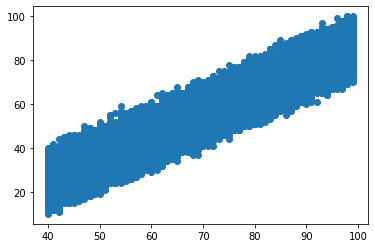

In [17]:
plt.scatter(data['Previous Scores'],data['Performance Index'])

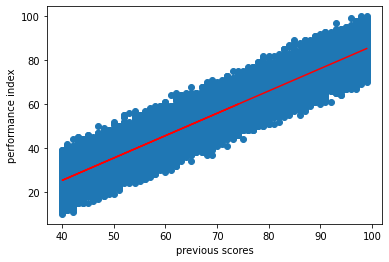

In [16]:
msk = np.random.rand(len(data)) < .8
train = data[msk]
test = data[~msk]
from sklearn import linear_model 
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Previous Scores']])
train_y = np.asanyarray(train[['Performance Index']])
reg.fit(train_x,train_y)
plt.scatter(train_x,train_y)
plt.plot(train_x , reg.coef_[0][0]*train_x + reg.intercept_[0],'-r')
plt.ylabel('performance index')
plt.xlabel('previous scores')
plt.show()

# Evaluation

In [18]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Previous Scores']])
test_y = np.asanyarray(test[['Performance Index']])
test_y_ = reg.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 6.62
Residual sum of squares (MSE): 59.91
R2-score: 0.83
